In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix

In [81]:
dataset=pd.read_csv('diabetes.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [82]:
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [83]:
dataset['Insulin'].replace(0,np.NaN, inplace= True)
dataset['Glucose'].replace(0, np.nan, inplace= True)
dataset['BloodPressure'].replace(0, np.nan, inplace= True)
dataset['SkinThickness'].replace(0, np.nan, inplace= True)
dataset['BMI'].replace(0, np.nan, inplace= True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [84]:
dataset.dropna(subset=['Insulin'])
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [85]:
dataset['Insulin']=dataset['Insulin'].fillna(dataset['Insulin'].mode()[0])
dataset['BMI']=dataset['BMI'].fillna(dataset['BMI'].mode()[0])
dataset['SkinThickness']=dataset['SkinThickness'].fillna(dataset['SkinThickness'].mode()[0])
dataset['BloodPressure']=dataset['BloodPressure'].fillna(dataset['BloodPressure'].mode()[0])
dataset['Glucose']=dataset['Glucose'].fillna(dataset['Glucose'].mode()[0])

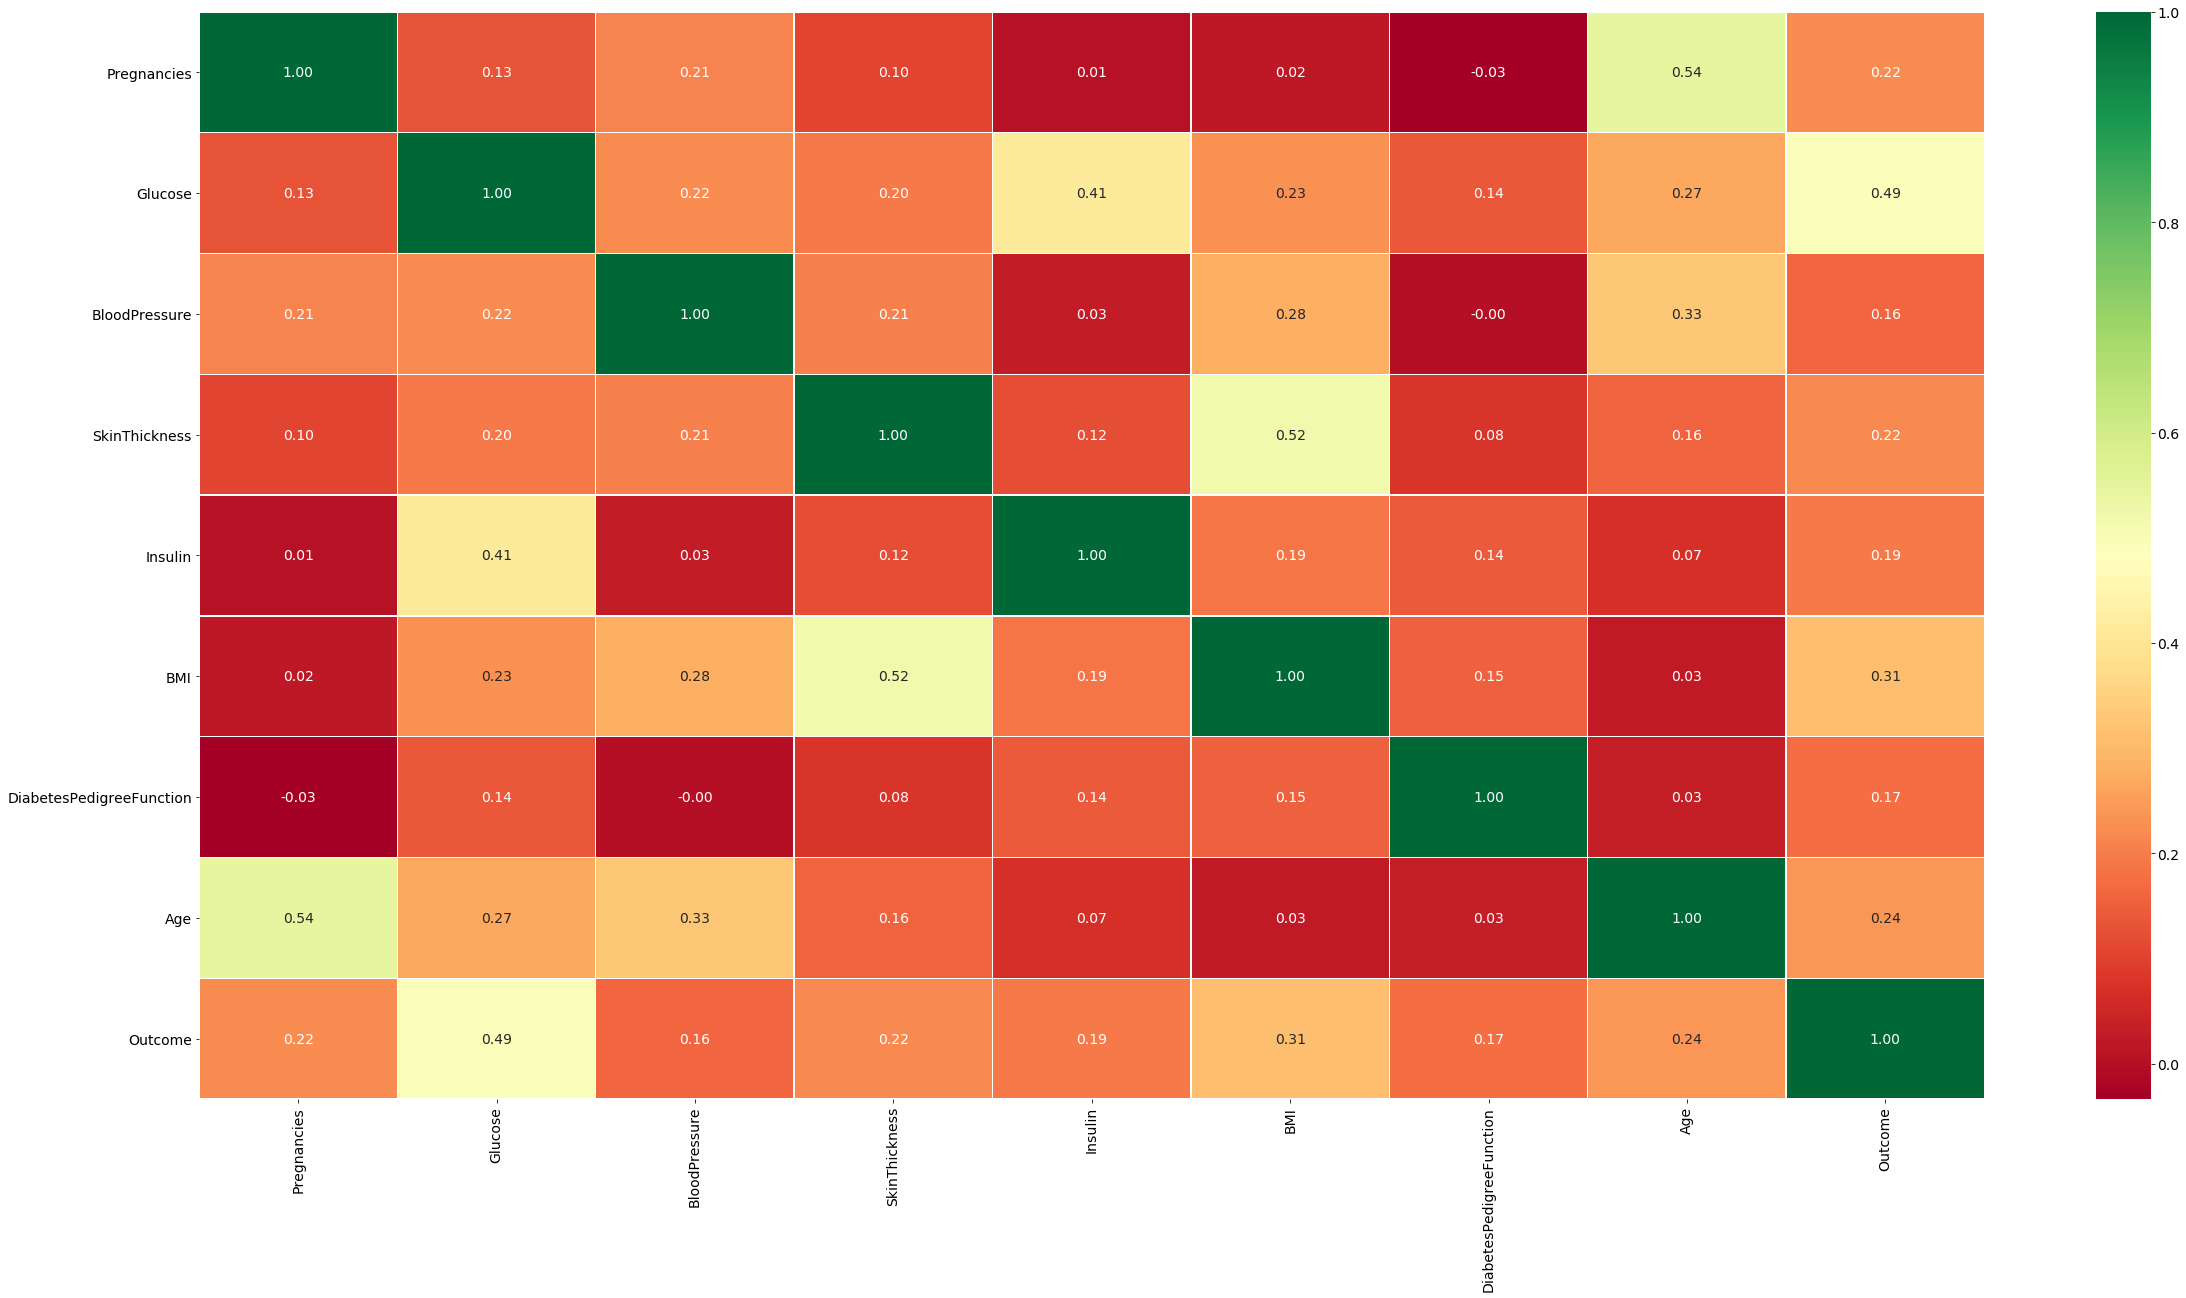

In [86]:
corr = dataset.corr()
sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In [87]:
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,8].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [89]:
acc={}

C:\Users\Naveneeth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Logistic Regression Accuracy: 79.65%
Logistic Regression AUC: 73.82%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       159
           1       0.71      0.58      0.64        72

   micro avg       0.80      0.80      0.80       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



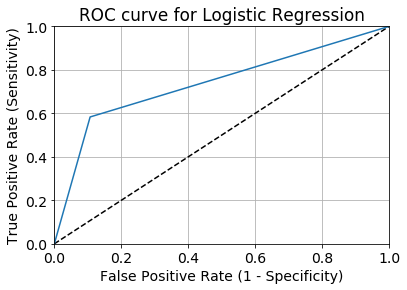

In [90]:
# LOGISTIC REGRESSION

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0, 1],[0, 1],'k--')

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

acc['Logistic Regression']=accuracy_score(y_test, y_pred) * 100
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, y_pred))

[[142  17]
 [ 30  42]]


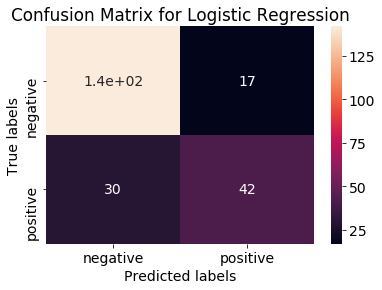

In [91]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);


SVM Accuracy: 81.82%
SVM AUC: 76.53%
SVM Classification report:

               precision    recall  f1-score   support

           0       0.84      0.91      0.87       159
           1       0.75      0.62      0.68        72

   micro avg       0.82      0.82      0.82       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.81      0.82      0.81       231



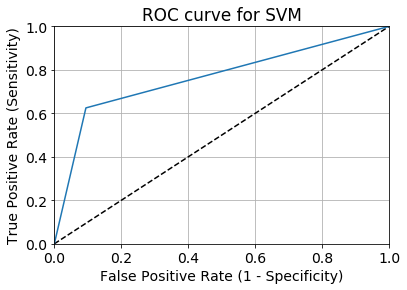

In [92]:
# SVM ALGORITHM 

svclassifier = SVC(kernel='linear',C=10,gamma=100)  
svc=svclassifier.fit(X_train, y_train)  

y_pred = svclassifier.predict(X_test)
acc_svc=accuracy_score(y_test,y_pred)
#print(y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0, 1],[0, 1],'k--')

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)


acc['SVM']=accuracy_score(y_test, y_pred) * 100

print('\nSVM Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('SVM AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('SVM Classification report:\n\n', classification_report(y_test, y_pred))

[[144  15]
 [ 27  45]]


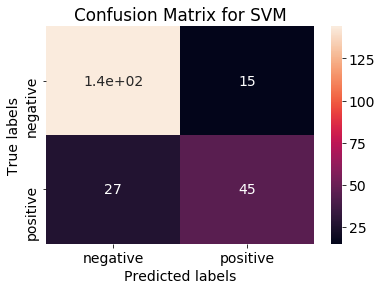

In [93]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);


NAIVE BAYES Accuracy: 79.22%
NAIVE BAYES AUC: 75.41%
NAIVE BAYES Classification report:

               precision    recall  f1-score   support

           0       0.84      0.86      0.85       159
           1       0.67      0.65      0.66        72

   micro avg       0.79      0.79      0.79       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



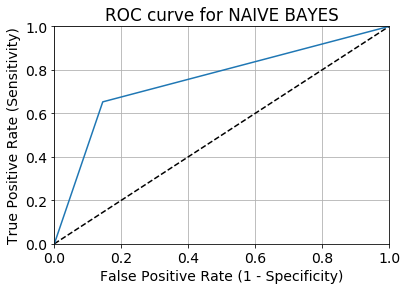

In [94]:
# NAIVE BAYES

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0, 1],[0, 1],'k--')

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for NAIVE BAYES')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)


acc['NAIVE BAYES']=accuracy_score(y_test, y_pred) * 100

print('\nNAIVE BAYES Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('NAIVE BAYES AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('NAIVE BAYES Classification report:\n\n', classification_report(y_test, y_pred))

[[136  23]
 [ 25  47]]


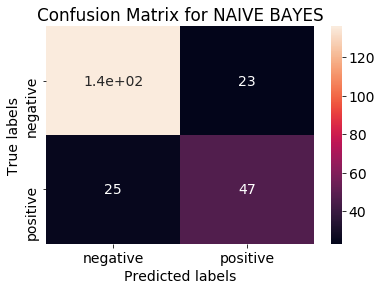

In [95]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for NAIVE BAYES'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);


XGB CLASSIFIER Accuracy: 83.12%
XGB CLASSIFIER AUC: 80.90%
XGB CLASSIFIER Classification report:

               precision    recall  f1-score   support

           0       0.88      0.87      0.88       159
           1       0.72      0.75      0.73        72

   micro avg       0.83      0.83      0.83       231
   macro avg       0.80      0.81      0.81       231
weighted avg       0.83      0.83      0.83       231



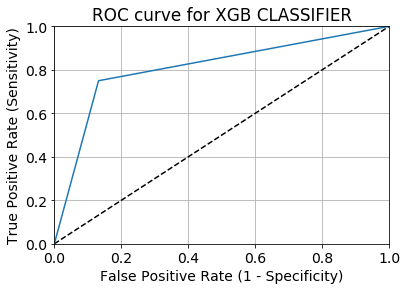

In [96]:
# XGB CLASSIFIER
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
acc_xgb=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0, 1],[0, 1],'k--')

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for XGB CLASSIFIER')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

acc['XGB CLASSIFIER']=accuracy_score(y_test, y_pred) * 100

print('\nXGB CLASSIFIER Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('XGB CLASSIFIER AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('XGB CLASSIFIER Classification report:\n\n', classification_report(y_test, y_pred))

[[138  21]
 [ 18  54]]


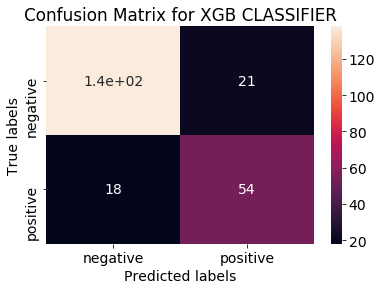

In [97]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for XGB CLASSIFIER'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);


GRADIENT BOOSTING CLASSIFIER Accuracy: 82.25%
GRADIENT BOOSTING CLASSIFIE AUC: 78.75%
GRADIENT BOOSTING CLASSIFIER Classification report:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       159
           1       0.72      0.69      0.71        72

   micro avg       0.82      0.82      0.82       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.82      0.82      0.82       231



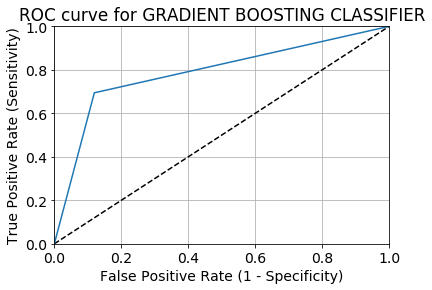

In [98]:
# GRADIENT BOOSTING CLASSIFIER

gbc=GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)
acc_gbc=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot([0, 1],[0, 1],'k--')

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 14

plt.title('ROC curve for GRADIENT BOOSTING CLASSIFIER')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)

acc['GRADIENT BOOSTING CLASSIFIER']=accuracy_score(y_test, y_pred) * 100

print('\nGRADIENT BOOSTING CLASSIFIER Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('GRADIENT BOOSTING CLASSIFIE AUC: {:.2f}%'.format(roc_auc_score(y_test, y_pred) * 100))
print('GRADIENT BOOSTING CLASSIFIER Classification report:\n\n', classification_report(y_test, y_pred))

[[140  19]
 [ 22  50]]


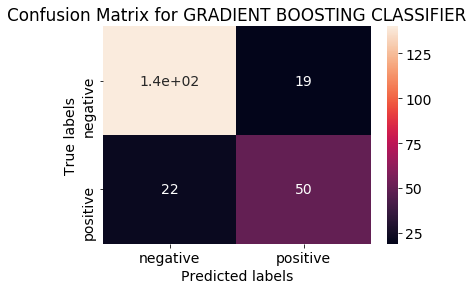

In [99]:
cm= confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
print(confusion_matrix(y_test, y_pred))
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for GRADIENT BOOSTING CLASSIFIER'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [100]:
print("Accuracy score for SUPPORT VECTOR MACHINE:",acc_svc)
print(" \nAccuracy score for LOGISTIC REGRESSION:",acc_lr)
print(" \nAccuracy score for NAIVE BAYES:",acc_nb)
print(" \nAccuracy score for GRADIENT BOOSTING CLASSIFIER:",acc_gbc)
print(" \nAccuracy score for XGB CLASSIFIER:",acc_xgb)

Accuracy score for SUPPORT VECTOR MACHINE: 0.8181818181818182
 
Accuracy score for LOGISTIC REGRESSION: 0.7965367965367965
 
Accuracy score for NAIVE BAYES: 0.7922077922077922
 
Accuracy score for GRADIENT BOOSTING CLASSIFIER: 0.8225108225108225
 
Accuracy score for XGB CLASSIFIER: 0.8311688311688312
